<a href="https://colab.research.google.com/github/yejiikim/AI-Mathematics/blob/main/Second_Order_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import jax.numpy as np
from jax import grad, hessian
import time
import random
import matplotlib
import matplotlib.pyplot as plt
#Gradient Descent
# Make threshold a -ve value if you want to run exactly
# max_iterations.
def gradient_descent(max_iterations,threshold,w_init,
 obj_func,grad_func,extra_param = [],
 learning_rate=0.05,momentum=0.8):

 w = w_init
 w_history = w
 f_history = obj_func(w,extra_param)
 delta_w = np.zeros(w.shape)
 i = 0
 diff = 1.0e10

 while i<max_iterations and diff>threshold:
  delta_w = -learning_rate*grad_func(w,extra_param) + momentum*delta_w
  w = w+delta_w
   # store the history of w and f
  w_history = np.vstack((w_history,w))
  f_history = np.vstack((f_history,obj_func(w,extra_param)))

  # update iteration number and diff between successive values
  # of objective function
  i+=1
  diff = np.absolute(f_history[-1]-f_history[-2])

 return w_history,f_history

# Newton Method
# Changes
# • Passing gradient_func and hessian_func as arguments.
# • Add extra_param, grad_threshold parameters.
# • Passing extra_param as an argument to the objective function.
# • hessian.shape -> np.reshape()
# newtons method function - inputs: g (input function), max_its (maximum number of iterations), w (initialization)
def newtons_method(max_its, w, obj_func, grad_func, hess_func,
                   extra_param = [], grad_threshold=10e-30, **kwargs):
 # set numericxal stability parameter / regularization parameter
 epsilon = 10**(-7)
 if 'epsilon' in kwargs:
  beta = kwargs['epsilon']
 # run the newtons method loop
 w_history = [w] # container for weight history
 f_history = [obj_func(w,extra_param)] # container for corresponding cost function history
 for k in range(max_its):
    # evaluate the gradient and hessian
    grad_eval = grad_func(w,extra_param)
    hess_eval = hess_func(w,extra_param)
    if np.linalg.norm(grad_eval) <= grad_threshold:
      break
    # reshape hessian to square matrix for numpy linalg functionality
    np.reshape(hess_eval, (int((np.size(hess_eval))**(0.5)),int((np.size(hess_eval))**(0.5))))

    # solve second order system system for weight update
    A = hess_eval + epsilon*np.eye(w.size)
    b = grad_eval
    w = np.linalg.solve(A,np.dot(A,w) - b)
 # store the history of w and f
    w_history = np.vstack((w_history,w))
    f_history = np.vstack((f_history,obj_func(w,extra_param)))
 return w_history,f_history
# BFGS
# Changes
# • Passing extra_param as arguments.
# • Passing extra_param as an argument to the objective function.
from scipy.optimize.linesearch import line_search_armijo
def bfgs(x0, obj_func, grad_func, extra_param = [],
         grad_threshold=1e-30, max_iter=100, n_linesearch=10):
 x = np.copy(x0)
 w_history = [np.copy(x0)]
 f_history = [obj_func(x, extra_param)]
 n_dims = x.shape[0]
 B = np.eye(n_dims)
 old_f = None

 g = grad_func(x, extra_param)

 for _ in range(max_iter):
  p = np.linalg.solve(B, -g)
  alpha, n_feval, old_f = line_search_armijo(obj_func, x, p, g, old_f)
  if alpha is None: 
    # found no solution that satisfies the conditions
    alpha = 1.0
  s = alpha * p
  x += s
  prev_g = g
  g = grad_func(x, extra_param)
  if np.linalg.norm(g) <= grad_threshold:
    break
  if prev_g is not None:
    y = g - prev_g
    B += (np.outer(y, y) / np.dot(y, s) -
    B.dot(s[:, np.newaxis]).dot(s[np.newaxis, :]).dot(B) / s.dot(B).dot(s))
 # store the history of w and f
  w_history = np.vstack((w_history, x))
  f_history = np.vstack((f_history, obj_func(x,extra_param)))
 return w_history, f_history
# Visualization
# • Add obj_func, scale parameter to visualize_learning()
# • Delete visualize_fw()
def visualize_fw(obj_func, scale, extra_param=[]):
 xcoord = np.linspace(-scale,scale,50)
 ycoord = np.linspace(-scale,scale,50)
 w1,w2 = np.meshgrid(xcoord,ycoord)
 pts = np.vstack((w1.flatten(),w2.flatten()))

 # All 2D points on the grid
 pts = pts.transpose()

 # Function value at each point
 f_vals = np.array([obj_func(pt, extra_param) for pt in pts])
 # function_plot(pts,f_vals)
 # plt.title('Objective Function Shown in Color')
 # plt.show()
 return pts,f_vals


# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
 plt.plot(xy[0],xy[1],marker='P',markersize=5,c=color)
 plt.annotate(text,xy=xy,xytext=xytext,
 # color=color,
 arrowprops=dict(arrowstyle="-",
 color = color,
 connectionstyle='arc3'))
# Plot the function
# Pts are 2D points and f_val is the corresponding function value

def function_plot(w1,w2,f_val):
 f_plot = plt.contour(w1,w2,f_val,

c=f_val.flatten(),vmin=min(f_val.flatten()),vmax=max(f_val.flatten()),
 cmap='RdBu_r', levels =
[0,0.1,0.3,0.5,1,1.5,4,8,12,16,20],
 linewidths = 1.5, nchunk = 10)
 plt.colorbar(f_plot)
 plt.xlabel(r'$w_0$')
 plt.ylabel(r'$w_1$', rotation='horizontal')
 # Show the optimal point
 annotate_pt('global minimum',(0,0),(-5,-7),'red')

def visualize_learning(obj_func, w_history, extra_param=[], scale=10):
 xcoord = np.linspace(-scale,scale,50)
 ycoord = np.linspace(-scale,scale,50)
 w1,w2 = np.meshgrid(xcoord,ycoord)
 pts = np.vstack((w1.flatten(),w2.flatten()))

 # All 2D points on the grid
 pts = pts.transpose()

 # Function value at each point
 f_val = np.array([[obj_func(np.array([w1[i][j], w2[i][j]]),
extra_param) for j, col in enumerate(row)] for i, row in
enumerate(w1)])
 # Make the function plot
 function_plot(w1,w2, f_val)

 # Plot the history
 plt.plot(w_history[:,0],w_history[:,1],marker='o',c='springgreen'
 , markeredgecolor='k', markeredgewidth=0.5)

 # Annotate the point found at last iteration
 annotate_pt('minimum found',
 (w_history[-1,0],w_history[-1,1]),
 (-1,7),'green')
 # iter = w_history.shape[0]
 # for w,i in zip(w_history,range(iter-1)):
 # # Annotate with arrows to show history
 # plt.annotate("",
 # xy=w, xycoords='data',
 # xytext=w_history[i+1,:], textcoords='data',
 # arrowprops=dict(arrowstyle='<-',
 # connectionstyle='angle3'))

# Objective Functions
def foo(w, extra=[]):
 return 0.26 * np.sum(w * w) - 0.48 * np.prod(w)

<ipython-input-1-eb46345213bd>:72: DeprecationWarning: Please use `line_search_armijo` from the `scipy.optimize` namespace, the `scipy.optimize.linesearch` namespace is deprecated.
  from scipy.optimize.linesearch import line_search_armijo


<ipython-input-1-eb46345213bd>:136: UserWarning: The following kwargs were not used by contour: 'c'
  f_plot = plt.contour(w1,w2,f_val,


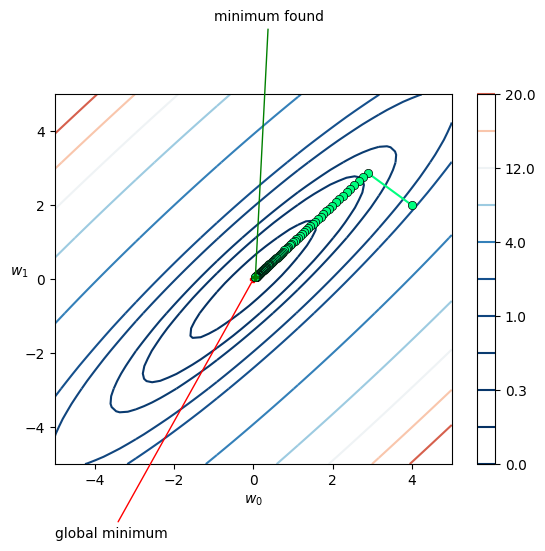

In [2]:
# Result
# Gradient descent
# w_init = random.uniform(-5,5,2)
w_init = np.array([4.0, 2.0])
w_history,f_history = gradient_descent(100, -1, w_init, foo,
grad(foo), learning_rate=1.0, momentum=0.0)
visualize_learning(foo, w_history, scale=5)

# WARNING:absl:No GPU/TPU found, falling back to CPU. (Set
# TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
# /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32:
# UserWarning: The following kwargs were not used by contour: 'c'

<ipython-input-1-eb46345213bd>:136: UserWarning: The following kwargs were not used by contour: 'c'
  f_plot = plt.contour(w1,w2,f_val,


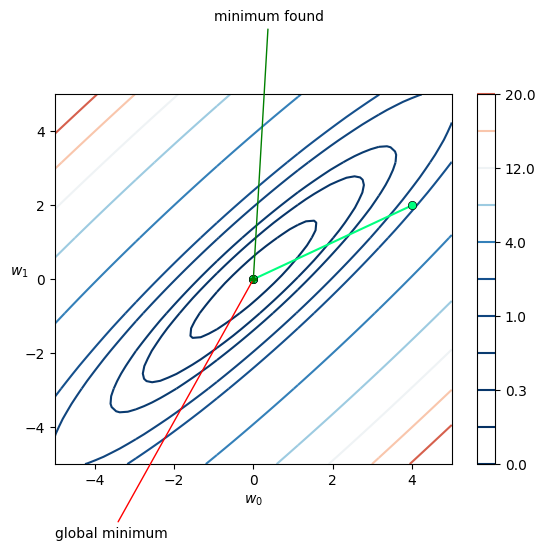

In [4]:
# Newton method

w_history,f_history = newtons_method(100, w_init, foo, grad(foo), hessian(foo), grad_threshold=10e-10)
visualize_learning(foo, w_history, scale=5)

# /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32:
# UserWarning: The following kwargs were not used by contour: 'c'


<ipython-input-1-eb46345213bd>:136: UserWarning: The following kwargs were not used by contour: 'c'
  f_plot = plt.contour(w1,w2,f_val,


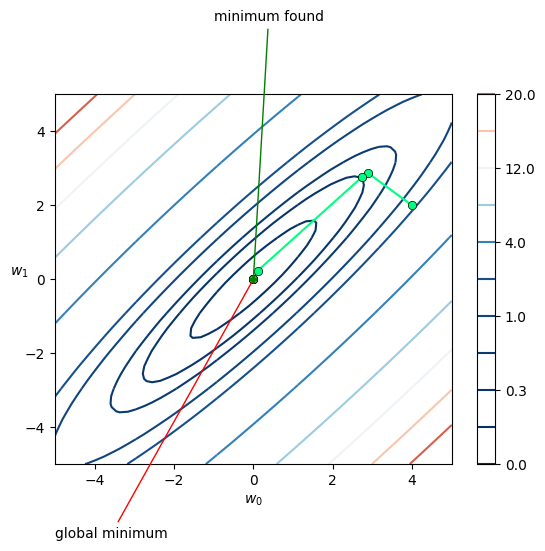

In [3]:
# BFGS
w_history,f_history = bfgs(w_init, foo, grad(foo), max_iter=100,
grad_threshold=1e-10)
visualize_learning(foo, w_history, scale=5)

# /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32:
# UserWarning: The following kwargs were not used by contour: 'c'